In [1]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# twitter api
consumer_key = []
consumer_secret = []
access_token = []
access_token_secret = []

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
target_user = ("@bbc", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

In [6]:
# Counter
counter = 1    

In [7]:
# variable for holding sentiments
sentiment_array = []

# loop through all target users
for target in target_user:
    
    # loop through 1 time (total of 100 tweets per page)
    for x in range(1):
        
        public_tweets = api.search(target, count=100, result_type="recent")
        
        # loop through all tweets
        
        for tweet in public_tweets["statuses"]:
            
            # run vader analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            # add sentiments for each tweet into an array
            sentiment_array.append({"UserName": target,
                                   # "UserName": tweet["user"]["screen_name"],
                                   "Date": tweet["created_at"],
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Neutral": neu,
                                   "Negative": neg,
                                   "Tweets Ago": counter})
            
            # add each value to appropiate array
            # compound_list.append(compund)
            # positive_list.append(pos)
            # neutral_list.append(neu)
            # negative_list.append(neg)
            # oldest_tweet = str(int(tweet["id_str"])-1)
            
            # counter = counter + 1
            
            if counter < 100:
                counter += 1
            else:
                counter = 1
            
            

In [8]:
sentiments_df = pd.DataFrame.from_dict(sentiment_array)
sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,UserName
0,-0.3134,Sun Dec 10 00:10:48 +0000 2017,0.094,0.906,0.000,1,@bbc
1,0.0000,Sun Dec 10 00:10:26 +0000 2017,0.000,1.000,0.000,2,@bbc
2,0.8750,Sun Dec 10 00:10:04 +0000 2017,0.000,0.607,0.393,3,@bbc
3,-0.3134,Sun Dec 10 00:09:49 +0000 2017,0.094,0.906,0.000,4,@bbc
4,0.5743,Sun Dec 10 00:09:34 +0000 2017,0.000,0.843,0.157,5,@bbc


In [9]:
sentiments_df.shape

(500, 7)

In [10]:
sentiments_df.tail()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,UserName
495,0.5267,Sun Dec 10 00:09:08 +0000 2017,0.000,0.833,0.167,96,@nytimes
496,0.0000,Sun Dec 10 00:09:05 +0000 2017,0.000,1.000,0.000,97,@nytimes
497,0.0000,Sun Dec 10 00:09:04 +0000 2017,0.000,1.000,0.000,98,@nytimes
498,0.0772,Sun Dec 10 00:09:03 +0000 2017,0.172,0.640,0.187,99,@nytimes
499,-0.2500,Sun Dec 10 00:09:00 +0000 2017,0.083,0.917,0.000,100,@nytimes


In [91]:
sentiments_df.to_csv("news_tweets_sentiments.csv", encoding="utf-8", index=False)

In [11]:
df_bbc = sentiments_df[sentiments_df['UserName']== '@bbc']
# df_bbc.sort_values("Tweets Ago", ascending=False).head()

In [12]:
df_cbs = sentiments_df[sentiments_df['UserName']== '@CBSNews']

In [13]:
df_cnn = sentiments_df[sentiments_df['UserName']== '@CNN']

In [14]:
df_fox = sentiments_df[sentiments_df['UserName']== '@FoxNews']

In [15]:
df_nytimes = sentiments_df[sentiments_df['UserName']== '@nytimes']

<br><br>
**Plot Sentiments**

In [16]:
x_bbc = np.arange(len(df_bbc["Compound"]))

In [17]:
y_bbc = df_bbc["Compound"]

In [18]:
z_bbc = df_bbc["UserName"].count()

In [19]:
x_cbs = np.arange(len(df_cbs["Compound"]))

In [20]:
y_cbs = df_cbs["Compound"]

In [21]:
z_cbs = df_cbs["UserName"].count()

In [22]:
x_cnn = np.arange(len(df_cnn["Compound"]))

In [23]:
y_cnn = df_cnn["Compound"]

In [24]:
z_cnn = df_cnn["UserName"].count()

In [25]:
x_fox = np.arange(len(df_fox["Compound"]))

In [26]:
y_fox = df_fox["Compound"]

In [27]:
z_fox = df_fox["UserName"].count()

In [28]:
x_ny = np.arange(len(df_nytimes["Compound"]))

In [29]:
y_ny = df_nytimes["Compound"]

In [131]:
z_ny = df_nytimes["UserName"].count()

In [132]:
plt.figure(figsize=(8,8))
plt.title("Sentiment Analysis of Media Tweets (12/9/17)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend((bbc_plot, cbs_plot, cnn_plot, fox_plot, ny_plot), 
           ('BBC', 'CBS', 'CNN', 'Fox', 'New York Times'),
           fontsize="small", mode="Expanded",
           numpoints=1, scatterpoints=1,
           bbox_to_anchor=(1,1),
           loc=2,
           title = 'Media Sources',
           labelspacing=0.5)
# plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

In [133]:
bbc_plot = plt.scatter(x_bbc,
                      y_bbc,
                      s=z_bbc*1,
                      c="lightskyblue",
                      edgecolors="black",
                      alpha=0.8, linewidth=1)

In [134]:
cbs_plot = plt.scatter(x_cbs,
                      y_cbs,
                      s=z_cbs*1,
                      c="green",
                      edgecolors="black",
                      alpha=0.8, linewidth=1)

In [135]:
cnn_plot = plt.scatter(x_cnn,
                      y_cnn,
                      s=z_cnn*1,
                      c="red",
                      edgecolors="black",
                      alpha=0.8, linewidth=1)

In [136]:
fox_plot = plt.scatter(x_fox,
                      y_fox,
                      s=z_fox*1,
                      c="blue",
                      edgecolors="black",
                      alpha=0.8, linewidth=1)

In [137]:
ny_plot = plt.scatter(x_ny,
                      y_ny,
                      s=z_ny*1,
                      c="yellow",
                      edgecolors="black",
                      alpha=0.8, linewidth=1)

In [138]:
plt.savefig("MediaTweets.png")

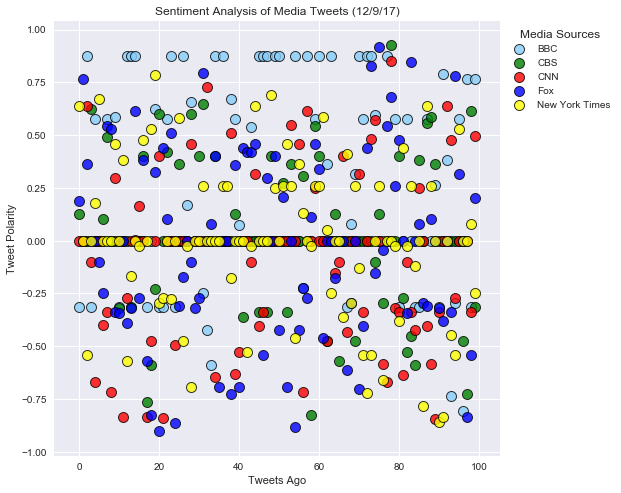

In [139]:
sns.set()
plt.show()

In [ ]:
# sns code to add legend
# fg.map(plt.scatter, 'tweets_ago', 'compound').add_legend()

In [38]:
# bar plot 
sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,UserName
0,-0.3134,Sun Dec 10 00:10:48 +0000 2017,0.094,0.906,0.000,1,@bbc
1,0.0000,Sun Dec 10 00:10:26 +0000 2017,0.000,1.000,0.000,2,@bbc
2,0.8750,Sun Dec 10 00:10:04 +0000 2017,0.000,0.607,0.393,3,@bbc
3,-0.3134,Sun Dec 10 00:09:49 +0000 2017,0.094,0.906,0.000,4,@bbc
4,0.5743,Sun Dec 10 00:09:34 +0000 2017,0.000,0.843,0.157,5,@bbc


In [39]:
sentiments_group = pd.DataFrame(sentiments_df[["Compound", "UserName"]])
sentiments_group.head()

,Compound,UserName
0,-0.3134,@bbc
1,0.0000,@bbc
2,0.8750,@bbc
3,-0.3134,@bbc
4,0.5743,@bbc


In [40]:
bbc_bar = sentiments_group[sentiments_group['UserName']== '@bbc']
bbc_polarity = bbc_bar['Compound'].mean()

In [41]:
cbs_bar = sentiments_group[sentiments_group['UserName']== '@CBSNews']
cbs_polarity = cbs_bar['Compound'].mean()

In [42]:
cnn_bar = sentiments_group[sentiments_group['UserName']== '@CNN']
cnn_polarity = cnn_bar['Compound'].mean()

In [43]:
fox_bar = sentiments_group[sentiments_group['UserName']== '@FoxNews']
fox_polarity = fox_bar['Compound'].mean()

In [44]:
nyt_bar = sentiments_group[sentiments_group['UserName']== '@nytimes']
nyt_polarity = nyt_bar['Compound'].mean()

In [77]:
y_axis = [bbc_polarity, cbs_polarity, cnn_polarity, 
          fox_polarity, nyt_polarity]

In [140]:
x_axis = np.arange(len(target_user))
x_axis

array([0, 1, 2, 3, 4])

In [141]:
plt.figure(figsize=(8,8))
plt.grid(False)
plt.title("Overall Media Sentiment based on Twitter(12/9/17)")
plt.ylabel("Tweet Polarity")

In [142]:
plt.bar(x_axis, y_axis, color=("lightskyblue", "green", "red", 
        "blue", "yellow"), alpha=0.5, align="edge", width=1.0)

<Container object of 5 artists>

In [143]:
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])

([<matplotlib.axis.XTick at 0x11a7b35c0>,
 <a list of 5 Text xticklabel objects>)

In [144]:
plt.savefig("MediaSentimentBarChart.png")

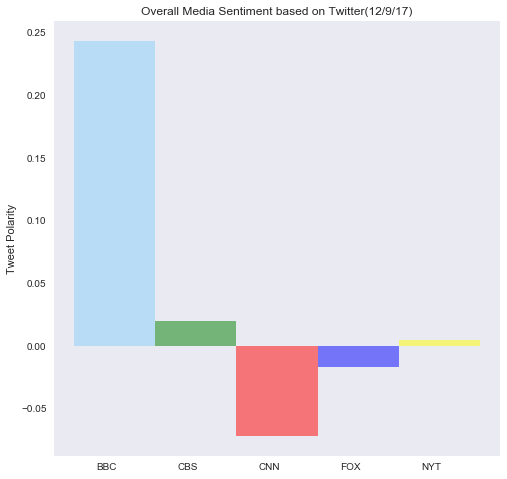

In [145]:
sns.set()
plt.show()